## 数据加载

In [1]:
import numpy as np

we_train = np.load('../data/train_we_(32193, 120).npy')
we_test = np.load('../data/test_we_(1613, 120).npy')

y_train = np.load('../data/train_label_(32193, 2).npy')
y_test = np.load('../data/test_label_(1613, 2).npy')

we_train.shape, we_test.shape, y_train.shape, y_test.shape

((32193, 120), (1613, 120), (32193, 2), (1613, 2))

In [2]:
print(we_train[1,:])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  252  319   98
   52   77    7 2185    2 5873 1197   16   19    1  791 2493  431   53
   77    7 2185  319   98  587  319   98]


In [3]:
import numpy as np

img_train = np.load('/home/yangtianyun/MM_course/ft-feature/trainall_feature.npy')
img_test = np.load('/home/yangtianyun/MM_course/ft-feature/test_feature.npy')

y_train = np.load('/home/yangtianyun/MM_course/ft-feature/trainall_label.npy')
y_test = np.load('/home/yangtianyun/MM_course/ft-feature/test_label.npy')

img_train.shape, img_test.shape, y_train.shape, y_test.shape

((17670, 512), (967, 512), (17670, 1), (967, 1))

In [4]:
import numpy as np

train_text_index=np.load('/home/yangtianyun/MM_course/names/train_index.npy')
test_text_index=np.load('/home/yangtianyun/MM_course/names/test_index.npy')

train_img_index=np.load('/home/yangtianyun/MM_course/names/train_img_index.npy')
test_img_index=np.load('/home/yangtianyun/MM_course/names/test_img_index.npy')

train_text_index.shape, test_text_index.shape, train_img_index.shape, test_img_index.shape

((32193,), (1613,), (17670,), (967,))

In [5]:
print(train_text_index[:10])
print(train_img_index[:10])

[ 0  1  2  3  4  5  6  7  9 10]
[ 1  2  3  6  7  9 10 11 12 13]


In [6]:
img_train_new=np.zeros([32193,512])
train_img_index_list=train_img_index.tolist()

for i in range(train_text_index.shape[0]):
    if train_text_index[i] in train_img_index_list:
        img_train_new[i,:]=img_train[train_img_index_list.index(train_text_index[i]),:]

In [8]:
img_test_new=np.zeros([1613,512])
test_img_index_list=test_img_index.tolist()
print(test_text_index.shape[0])
for i in range(test_text_index.shape[0]):
    if test_text_index[i] in test_img_index_list:
        img_test_new[i,:]=img_test[test_img_index_list.index(test_text_index[i]),:]

1613


In [9]:
print(img_test_new.shape)
print(img_train_new.shape)

(1613, 512)
(32193, 512)


In [10]:
np.save('/home/yangtianyun/MM_course/ft-feature/train_img_aligned.npy',img_train_new)
np.save('/home/yangtianyun/MM_course/ft-feature/test_img_aligned.npy',img_test_new)

In [1]:
import numpy as np

we_train = np.load('../data/train_we_(32193, 120).npy')
we_test = np.load('../data/test_we_(1613, 120).npy')
git push
y_train = np.load('../data/train_label_(32193, 2).npy')
y_test = np.load('../data/test_label_(1613, 2).npy')

we_train.shape, we_test.shape, y_train.shape, y_test.shape

img_train_new=np.load('/home/yangtianyun/MM_course/ft-feature/train_img_aligned.npy')
img_test_new=np.load('/home/yangtianyun/MM_course/ft-feature/test_img_aligned.npy')

## 模型训练

In [2]:
from Multimodality import Multimodel

Using TensorFlow backend.
/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yangtianyun/anaconda3/lib/python3.7

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from train import train

### 1. 单图像

In [6]:
model = Multimodel(only_img_branch=True).model
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_img (InputLayer)       (None, 512)               0         
_________________________________________________________________
fake_output (Dense)          (None, 2)                 1026      
Total params: 1,026
Trainable params: 1,026
Non-trainable params: 0
_________________________________________________________________


train
Train on 32193 samples, validate on 1613 samples
Epoch 1/5
32193/32193 [==============================] - 1s 26us/step - loss: 0.3600 - accuracy: 0.7681 - val_loss: 0.7182 - val_accuracy: 0.6832
Epoch 2/5
32193/32193 [==============================] - 1s 25us/step - loss: 0.3561 - accuracy: 0.7681 - val_loss: 0.7153 - val_accuracy: 0.6857
Epoch 3/5
32193/32193 [==============================] - 1s 25us/step - loss: 0.3545 - accuracy: 0.7686 - val_loss: 0.7309 - val_accuracy: 0.6894
Epoch 4/5
32193/32193 [==============================] - 1s 26us/step - loss: 0.3540 - accuracy: 0.7685 - val_loss: 0.7051 - val_accuracy: 0.6900
Epoch 5/5
32193/32193 [==============================] - 1s 26us/step - loss: 0.3538 - accuracy: 0.7682 - val_loss: 0.7126 - val_accuracy: 0.6882


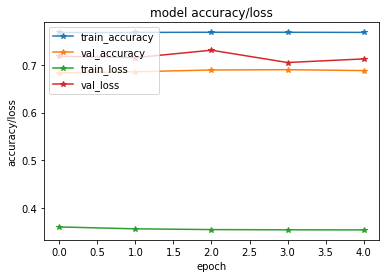


TEST_sz: 1613

Accuracy: 0.6900185988840669

              precision    recall  f1-score   support

       truth      0.657     0.920     0.766       891
       rumor      0.805     0.406     0.540       722

   micro avg      0.690     0.690     0.690      1613
   macro avg      0.731     0.663     0.653      1613
weighted avg      0.723     0.690     0.665      1613
 samples avg      0.690     0.690     0.690      1613




In [10]:
# 参数 model_name: best model的weights文件保存在 './model/{}.hdf5'.format(model_name) 路径下
train(model=model, model_name='img_only',
      train_data=[we_train,img_train_new], test_data=[we_test,img_test_new],
      train_label=y_train, test_label=y_test,
      epochs=5, batch_size=128)

### 2.图像+文本 attention

In [4]:
model = Multimodel(img_text_branches=True).model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_txt (InputLayer)          (None, 120)          0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 120, 300)     1800000     input_txt[0][0]                  
__________________________________________________________________________________________________
BiGRU (Bidirectional)           (None, 120, 64)      63936       Embedding[0][0]                  
__________________________________________________________________________________________________
mean_pooling (GlobalAveragePool (None, 64)           0           BiGRU[0][0]                      
____________________________________________________________________________________________

train
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 32193 samples, validate on 1613 samples
Epoch 1/20
32193/32193 [==============================] - 45s 1ms/step - loss: 0.2385 - accuracy: 0.9266 - val_loss: 0.5427 - val_accuracy: 0.7849
Epoch 2/20
32193/32193 [==============================] - 44s 1ms/step - loss: 0.1021 - accuracy: 0.9733 - val_loss: 0.5289 - val_accuracy: 0.7917
Epoch 3/20
32193/32193 [==============================] - 44s 1ms/step - loss: 0.0764 - accuracy: 0.9816 - val_loss: 0.4653 - val_accuracy: 0.8196
Epoch 4/20
32193/32193 [==============================] - 44s 1ms/step - loss: 0.0627 - accuracy: 0.9850 - val_loss: 0.5184 - val_accuracy: 0.8004
Epoch 5/20
32193/32193 [==============================] - 44s 1ms/step - loss: 0.0526 - accuracy: 0.9890 - val_loss: 0.5019 - val_accuracy: 0.8177
Epoch 6/20
32193/32193 [==============================] - 44s 1ms/step - loss: 0.045

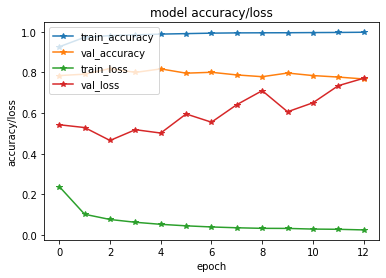


TEST_sz: 1613

Accuracy: 0.819590824550527

              precision    recall  f1-score   support

       truth      0.786     0.926     0.850       891
       rumor      0.883     0.688     0.774       722

   micro avg      0.820     0.820     0.820      1613
   macro avg      0.834     0.807     0.812      1613
weighted avg      0.829     0.820     0.816      1613
 samples avg      0.820     0.820     0.820      1613




In [5]:
# 参数 model_name: best model的weights文件保存在 './model/{}.hdf5'.format(model_name) 路径下
train(model=model, model_name='multi_model',
      train_data=[we_train,img_train_new], test_data=[we_test,img_test_new],
      train_label=y_train, test_label=y_test,
      epochs=20, batch_size=128)

### 图像+文本 concate融合

In [6]:
model = Multimodel(img_text_branches=True,fusion_mode='concat').model
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_txt (InputLayer)          (None, 120)          0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 120, 300)     1800000     input_txt[0][0]                  
__________________________________________________________________________________________________
BiGRU (Bidirectional)           (None, 120, 64)      63936       Embedding[0][0]                  
__________________________________________________________________________________________________
mean_pooling (GlobalAveragePool (None, 64)           0           BiGRU[0][0]                      
____________________________________________________________________________________________

train
Train on 32193 samples, validate on 1613 samples
Epoch 1/20
32193/32193 [==============================] - 45s 1ms/step - loss: 0.2493 - accuracy: 0.9132 - val_loss: 0.7294 - val_accuracy: 0.7210
Epoch 2/20
32193/32193 [==============================] - 44s 1ms/step - loss: 0.0980 - accuracy: 0.9739 - val_loss: 0.9152 - val_accuracy: 0.6857
Epoch 3/20
32193/32193 [==============================] - 45s 1ms/step - loss: 0.0749 - accuracy: 0.9806 - val_loss: 0.8900 - val_accuracy: 0.7092
Epoch 4/20
32193/32193 [==============================] - 44s 1ms/step - loss: 0.0562 - accuracy: 0.9867 - val_loss: 0.8891 - val_accuracy: 0.7328
Epoch 5/20
32193/32193 [==============================] - 45s 1ms/step - loss: 0.0475 - accuracy: 0.9899 - val_loss: 0.6145 - val_accuracy: 0.7960
Epoch 6/20
32193/32193 [==============================] - 44s 1ms/step - loss: 0.0387 - accuracy: 0.9924 - val_loss: 0.6876 - val_accuracy: 0.7799
Epoch 7/20
32193/32193 [==============================] - 44s 1

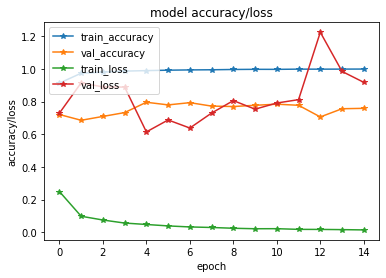


TEST_sz: 1613

Accuracy: 0.7960322380657161

              precision    recall  f1-score   support

       truth      0.763     0.915     0.832       891
       rumor      0.861     0.650     0.740       722

   micro avg      0.796     0.796     0.796      1613
   macro avg      0.812     0.782     0.786      1613
weighted avg      0.807     0.796     0.791      1613
 samples avg      0.796     0.796     0.796      1613




In [7]:
# 参数 model_name: best model的weights文件保存在 './model/{}.hdf5'.format(model_name) 路径下
train(model=model, model_name='multi_model_concate',
      train_data=[we_train,img_train_new], test_data=[we_test,img_test_new],
      train_label=y_train, test_label=y_test,
      epochs=20, batch_size=128)

### 文本+图像 bilinear融合

In [4]:
model = Multimodel(img_text_branches=True,fusion_mode='bilinear').model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_txt (InputLayer)          (None, 120)          0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 120, 300)     1800000     input_txt[0][0]                  
__________________________________________________________________________________________________
BiGRU (Bidirectional)           (None, 120, 64)      63936       Embedding[0][0]                  
__________________________________________________________________________________________________
mean_pooling (GlobalAveragePool (None, 64)           0           BiGRU[0][0]                      
____________________________________________________________________________________________

train
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 32193 samples, validate on 1613 samples
Epoch 1/20
32193/32193 [==============================] - 46s 1ms/step - loss: 0.4459 - accuracy: 0.7396 - val_loss: 0.5680 - val_accuracy: 0.7092
Epoch 2/20
32193/32193 [==============================] - 45s 1ms/step - loss: 0.3878 - accuracy: 0.7585 - val_loss: 0.6026 - val_accuracy: 0.7006
Epoch 3/20
32193/32193 [==============================] - 45s 1ms/step - loss: 0.3717 - accuracy: 0.7645 - val_loss: 0.7672 - val_accuracy: 0.6460
Epoch 4/20
32193/32193 [==============================] - 45s 1ms/step - loss: 0.3633 - accuracy: 0.7675 - val_loss: 0.6663 - val_accuracy: 0.6832
Epoch 5/20
32193/32193 [==============================] - 45s 1ms/step - loss: 0.3513 - accuracy: 0.7710 - val_loss: 0.7303 - val_accuracy: 0.6615
Epoch 6/20
32193/32193 [==============================] - 45s 1ms/step - loss: 0.348

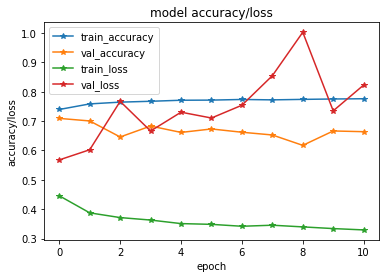


TEST_sz: 1613

Accuracy: 0.7092374457532548

              precision    recall  f1-score   support

       truth      0.686     0.872     0.768       891
       rumor      0.763     0.508     0.610       722

   micro avg      0.709     0.709     0.709      1613
   macro avg      0.725     0.690     0.689      1613
weighted avg      0.721     0.709     0.697      1613
 samples avg      0.709     0.709     0.709      1613




In [5]:
# 参数 model_name: best model的weights文件保存在 './model/{}.hdf5'.format(model_name) 路径下
train(model=model, model_name='multi_model_bilinear',
      train_data=[we_train,img_train_new], test_data=[we_test,img_test_new],
      train_label=y_train, test_label=y_test,
      epochs=20, batch_size=128)

### 文本-图像 全连接层融合

In [4]:
model = Multimodel(img_text_branches=True,fusion_mode='fc').model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_txt (InputLayer)          (None, 120)          0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 120, 300)     1800000     input_txt[0][0]                  
__________________________________________________________________________________________________
BiGRU (Bidirectional)           (None, 120, 64)      63936       Embedding[0][0]                  
__________________________________________________________________________________________________
mean_pooling (GlobalAveragePool (None, 64)           0           BiGRU[0][0]                      
____________________________________________________________________________________________

train
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 32193 samples, validate on 1613 samples
Epoch 1/20
32193/32193 [==============================] - 53s 2ms/step - loss: 0.1758 - accuracy: 0.9444 - val_loss: 0.8373 - val_accuracy: 0.7216
Epoch 2/20
32193/32193 [==============================] - 52s 2ms/step - loss: 0.0796 - accuracy: 0.9788 - val_loss: 0.6596 - val_accuracy: 0.7681
Epoch 3/20
32193/32193 [==============================] - 52s 2ms/step - loss: 0.0510 - accuracy: 0.9872 - val_loss: 0.8194 - val_accuracy: 0.7464
Epoch 4/20
32193/32193 [==============================] - 51s 2ms/step - loss: 0.0354 - accuracy: 0.9919 - val_loss: 0.5678 - val_accuracy: 0.8134
Epoch 5/20
32193/32193 [==============================] - 52s 2ms/step - loss: 0.0245 - accuracy: 0.9949 - val_loss: 0.6625 - val_accuracy: 0.8078
Epoch 6/20
32193/32193 [==============================] - 52s 2ms/step - loss: 0.017

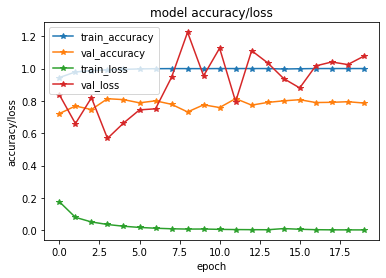


TEST_sz: 1613

Accuracy: 0.8140111593304402

              precision    recall  f1-score   support

       truth      0.776     0.932     0.847       891
       rumor      0.888     0.669     0.763       722

   micro avg      0.814     0.814     0.814      1613
   macro avg      0.832     0.800     0.805      1613
weighted avg      0.826     0.814     0.809      1613
 samples avg      0.814     0.814     0.814      1613




In [5]:
# 参数 model_name: best model的weights文件保存在 './model/{}.hdf5'.format(model_name) 路径下
train(model=model, model_name='multi_model_fc',
      train_data=[we_train,img_train_new], test_data=[we_test,img_test_new],
      train_label=y_train, test_label=y_test,
      epochs=20, batch_size=128)

## 文本图像情感attention

In [1]:
import numpy as np

we_train = np.load('../data/train_we_(32193, 120).npy')
we_test = np.load('../data/test_we_(1613, 120).npy')

y_train = np.load('../data/train_label_(32193, 2).npy')
y_test = np.load('../data/test_label_(1613, 2).npy')

print(we_train.shape, we_test.shape, y_train.shape, y_test.shape)

img_train_new=np.load('/home/yangtianyun/MM_course/ft-feature/train_img_aligned.npy')
img_test_new=np.load('/home/yangtianyun/MM_course/ft-feature/test_img_aligned.npy')

img_train_emo=np.load('/home/yangtianyun/test/MM-Course/yangtianyun/train_emo_feature_aligned.npy')
img_test_emo=np.load('/home/yangtianyun/test/MM-Course/yangtianyun/test_emo_feature_aligned.npy')

txt_train_emo=np.load('/home/yangtianyun/test/MM-Course/yangtianyun/text_train_emotion.npy')
txt_test_emo=np.load('/home/yangtianyun/test/MM-Course/yangtianyun/text_test_emotion.npy')

print(txt_train_emo.shape, txt_test_emo.shape,img_train_emo.shape, img_test_emo.shape)

(32193, 120) (1613, 120) (32193, 2) (1613, 2)
(32193, 55) (1613, 55) (32193, 256) (1613, 256)


In [3]:
from Multimodality import Multimodel_emoatt

Using TensorFlow backend.
/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yangtianyun/anaconda3/lib/python3.7

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model = Multimodel_emoatt(emoatt=True,fusion_mode='attention').model
model.summary()

Tensor("reshape_5/Reshape:0", shape=(?, 2, 1), dtype=float32)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_txt (InputLayer)          (None, 120)          0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 120, 300)     1800000     input_txt[0][0]                  
__________________________________________________________________________________________________
BiGRU (Bidirectional)           (None, 120, 64)      63936       Embedding[0][0]                  
__________________________________________________________________________________________________
mean_pooling (GlobalAveragePool (None, 64)           0           BiGRU[0][0]                      
______________________________

In [5]:
from train import train

train
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 32193 samples, validate on 1613 samples
Epoch 1/20
32193/32193 [==============================] - 55s 2ms/step - loss: 0.2702 - accuracy: 0.9139 - val_loss: 0.6347 - val_accuracy: 0.7322
Epoch 2/20
32193/32193 [==============================] - 54s 2ms/step - loss: 0.1182 - accuracy: 0.9741 - val_loss: 0.7475 - val_accuracy: 0.7216
Epoch 3/20
32193/32193 [==============================] - 55s 2ms/step - loss: 0.0913 - accuracy: 0.9808 - val_loss: 0.7694 - val_accuracy: 0.7433
Epoch 4/20
32193/32193 [==============================] - 51s 2ms/step - loss: 0.0759 - accuracy: 0.9854 - val_loss: 0.9692 - val_accuracy: 0.7061
Epoch 5/20
32193/32193 [==============================] - 50s 2ms/step - loss: 0.0689 - accuracy: 0.9869 - val_loss: 0.7283 - val_accuracy: 0.7433
Epoch 6/20
32193/32193 [==============================] - 51s 2ms/step - loss: 0.064

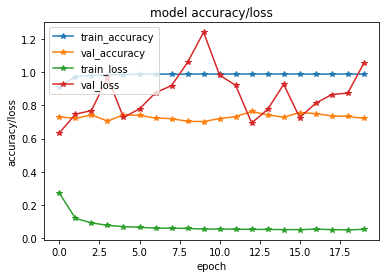


TEST_sz: 1613

Accuracy: 0.7637941723496591

              precision    recall  f1-score   support

       truth      0.742     0.878     0.804       891
       rumor      0.805     0.623     0.703       722

   micro avg      0.764     0.764     0.764      1613
   macro avg      0.773     0.750     0.753      1613
weighted avg      0.770     0.764     0.759      1613
 samples avg      0.764     0.764     0.764      1613




In [6]:
# 参数 model_name: best model的weights文件保存在 './model/{}.hdf5'.format(model_name) 路径下
train(model=model, model_name='multi_model_emoatt',
      train_data=[we_train,img_train_new,txt_train_emo,img_train_emo], test_data=[we_test,img_test_new,txt_test_emo,img_test_emo],
      train_label=y_train, test_label=y_test,
      epochs=20, batch_size=128)